# Classify and identify automobile images with Keras (Tensorflow as backend)

Keras is a high level deep learning API that helps quickly build neural networks via a modular approach. Keras is built on top of Tensorflow provides support for training on CPU or GPU. With Keras, users can design and iterate on machine learning ideas, moving from experiments to production very quickly. In this tutorial, we will introduce several key Keras API calls and features.Today we're going to build, train and evaluate some deep learning classifiers in the context of Computer Vision with the CIFAR-10 dataset, a collection of images that can be clasffied into diffrent categories based on type. By the end of this tutorial you'll be able to apply the concepts here in your own projects.

The CIFAR-10 data set  is one of the more well known classification problems in machine learning, anagalous to doing descriptive statistics with the titanic dataset. Cifar-10 contains 60000 32 × 32 pixel color images in 10 separate classes, with 6000 images per class. For training and testing, the set contains 50000 training images and 10000 in the test/validation image set.

[Read more about it here](https://www.cs.toronto.edu/~kriz/cifar.html)

Luckily, keras has this dataset built in, but incase you run into issues, or would like to import it yourself

[Click here to download the set!](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

## Keras installation

The recommended method to install Keras into a python enviromment is to use Anaconda. So thats what well do now!
Run the following command to get started:

[Keras on Anaconda](https://anaconda.org/conda-forge/keras)

```
sudo conda install -c conda-forge keras
```

## Importing our modules
The first thing we need to do is to import alll of the neccesary modules from Keras, as well as our plotting tools( for visualizing whats going on under the hood)

In [7]:
#### Do an explanaiton fo the keras imports  section by section for clarity. Fulle xplantion on initialization

#### explain batch, epoch Soft max for the last layer


# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
# import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

Next, we need to begin the set up for splitting our data into smaller sections, for processing this is a usal step, since attempting to run all of the data in the model all at one would result in slower run times and crashes!

In [2]:
#batch, classes and epochs sections
 
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #number of cifar-10 data set classes
epochs = 100 # repeat 100 times

# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


# Note: An epoch is one forward pass and one backward pass of all the training examples

Next, we need to load the training data as well as the test data into variables we can use in our model. This follows the same format as yure familiar with ! Lets get that done now.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 


The next thing that we will do is make a custom function that you can use in your future projects to visualize classes (or categories) that your images belong to. This will depend on the class_name list that we defined earlier 

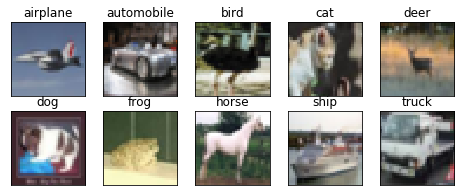

In [4]:
def visualize_classes():
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        features_idx = x_train[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num,::],(1,2,0))
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()
    
    
visualize_classes()

A special note in working with data and neural networks is that some preprocessing is involved.

Pixel values are in the range of 0 to 255 for each of the red, green and blue channels. (If you're in web or mobile, and youve done your colors with RGB, this is where the values come from)

Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255( the end of the RBG color spectrum.

The data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [5]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

The output variables are defined as a vector of integers from 0 to 1 for each class. In this case

# Convolutional Layers and Setting up your neural network for image recognition


### Biological mimicry in image recogniton

You may ask yourself, what's the big deal about using a convolutional neural networks for image recognition? Well that comes down to how it mimics pattern recognition in the visual cortex! The visual cortex is a part of your brain that is the powerhouse of sight, vision, and object recognition. Many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field.
The receptive fields of different neurons may overlap, and together they tile the entire visual field. Some  of those neurons only fire on images of vertical lines, while others only fire to lines with different orientations (two neurons may have the same receptive field but fire on different line orientations and directions). Some neurons have larger receptive fields, and they fire on more complex patterns that are combinations of the patterns the lower levels have detected.

Below is a visual example of what this looks like.

![alt text](./visual_cortex_example.png)


This is the same system that allows us recognize patterns, and what is an image other than patterns that converge to make a consolidated image that your brain recognize as an item?

The most important building block of a CNN is the convolutional layer:6 neurons in the first convolutional layer are not connected to every single pixel in the input image , but only to pixels in their receptive fields. In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on low-level features in the first hidden layer, then assemble them into higher-level features in the next hidden layer, and so on. This structure is very common in real-world images, and is one of the reasons why convolutional neural networks work so well for image recognition.

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

In [15]:
sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Train model

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 15, 15)        18496     
__________